## The project about :
### [exploratory data analysis (EDA) on Airbnb listings data for a Chicago city]

### Table of content
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions


## Introduction 

### Dataset Description
This dataset about airbnb listings for a Chicago city,there are factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in this city.

In [1]:
#import packages that we use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

### Data Wrangling

In [2]:
#load dataset 

df1=pd.read_csv('listings.csv')
df=df1.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,NaN,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,NaN,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


In [3]:
df.shape

(8024, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8024 non-null   int64  
 1   name                            8024 non-null   object 
 2   host_id                         8024 non-null   int64  
 3   host_name                       8024 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8024 non-null   object 
 6   latitude                        8024 non-null   float64
 7   longitude                       8024 non-null   float64
 8   room_type                       8024 non-null   object 
 9   price                           8024 non-null   int64  
 10  minimum_nights                  8024 non-null   int64  
 11  number_of_reviews               8024 non-null   int64  
 12  last_review                     64

In [5]:
# columns names of data
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

##### Data types of columns in dataset

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [7]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.024000e+03,8.024000e+03,0.0,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,6460.000000,8024.000000,8024.000000,8024.000000
mean,3.135320e+17,1.679340e+08,NaN,41.894243,-87.662688,214.153290,15.600823,46.117896,1.878774,61.574526,201.967971,13.419990
std,3.734884e+17,1.585120e+08,NaN,0.061762,0.043762,290.968254,42.986730,87.624549,1.870660,177.424596,125.235404,21.271301
min,2.384000e+03,2.153000e+03,NaN,41.646767,-87.847243,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.366225e+07,3.327857e+07,NaN,41.867065,-87.686212,93.000000,2.000000,1.000000,0.520000,1.000000,89.000000,0.000000
50%,5.121381e+07,1.074344e+08,NaN,41.897425,-87.657943,150.000000,2.000000,14.000000,1.520000,3.000000,221.000000,5.000000
75%,7.145524e+17,2.679861e+08,NaN,41.937238,-87.631716,240.000000,32.000000,53.000000,2.770000,16.000000,319.000000,22.000000
max,9.154715e+17,5.203376e+08,NaN,42.022200,-87.529541,10000.000000,1125.000000,3194.000000,57.140000,655.000000,365.000000,885.000000


### Check missing values

In [8]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8024
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1564
reviews_per_month                 1564
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2471
dtype: int64

#### Observation: there are missing values in this data in columns(neighbourhood_group ,last_review ,reviews_per_month,license )

In [9]:
# check duplicated values

df.duplicated().sum().any()
# df.duplicated().sum()

False

#### Observation: NO duplicated  values

## Data Cleaning

In [10]:
# delete columns that not use it in this analysis
# drop id , host_name columns
# drop neighbourhood_group column because it has only missing values  


# df=df.drop(['id','host_name','neighbourhood_group'],axis=1,inplace=True)
df=df.drop(['id','host_name','neighbourhood_group'],axis=1)


In [11]:
df.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


### fill missing values in reviews_per_month column with 0 

In [12]:
df['reviews_per_month'].fillna(0,inplace=True)
df.isna().sum()

name                                 0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1564
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2471
dtype: int64

In [13]:
# fill all null values in dataset with 0

# df.drop(['last_review','license'])
df=df.fillna(0)


In [14]:
df.isna().sum()

name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

#### NOW ,There are no missing values in dataset

### Exploratory Data Analysis

###### In this section we make  Data visulalization

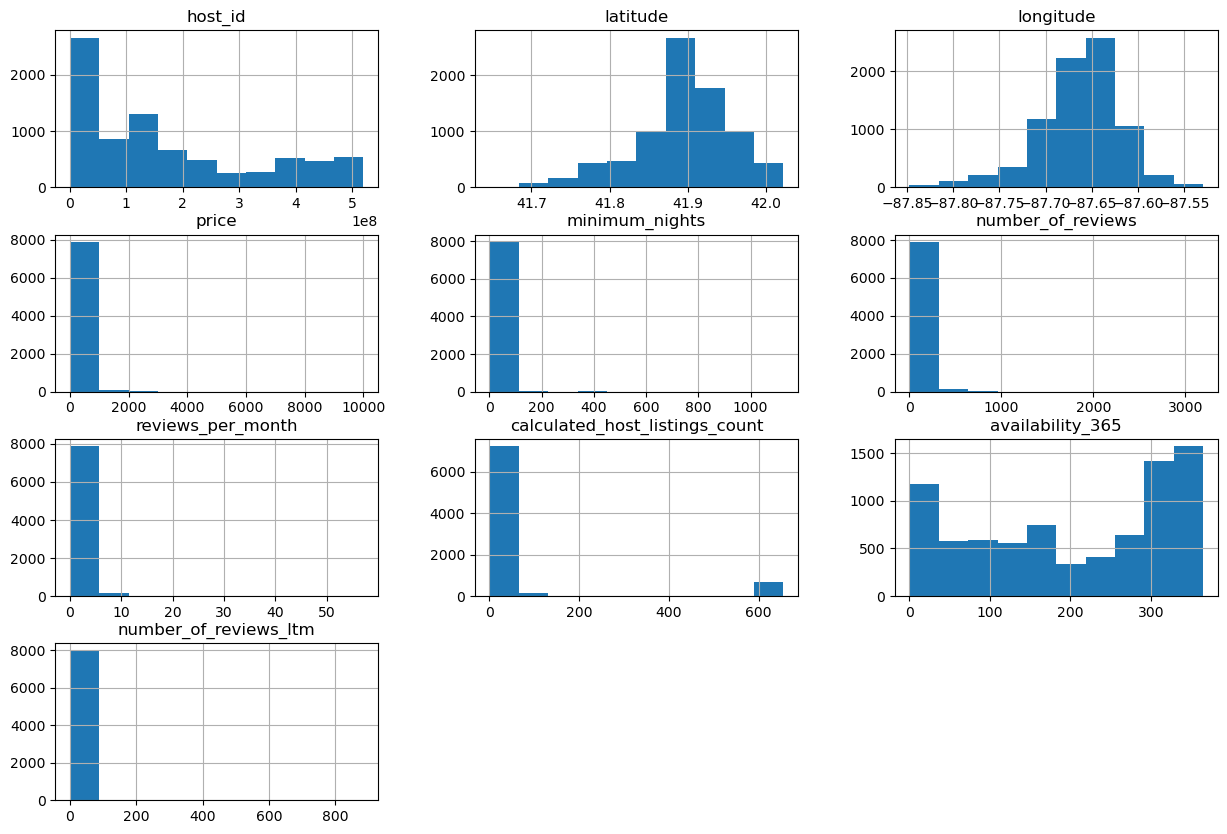

In [15]:
# make histgram on each column

df.hist(figsize=(15,10))
plt.show()

C:\Users\XPS 9560\AppData\Local\Temp\ipykernel_15352\3071373054.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

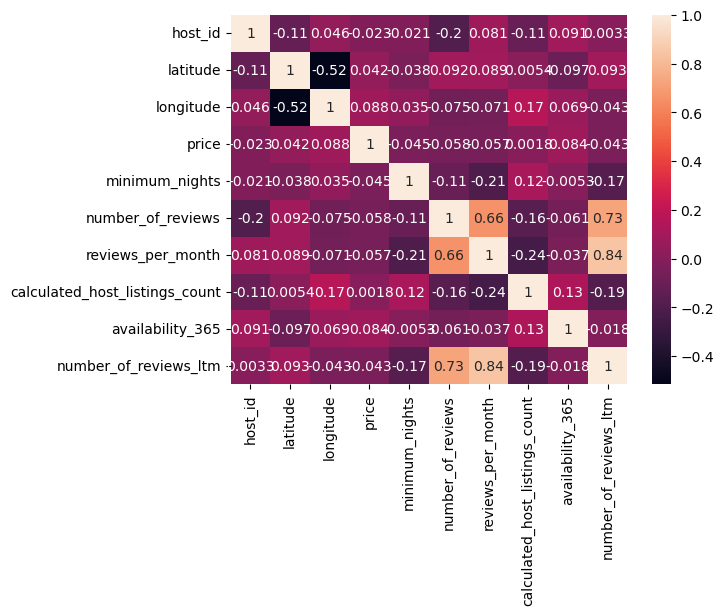

In [16]:
# make correlation matrix on data frame to show relationship between columns only numerical  
figsize=(15,15)
sns.heatmap(df.corr(),annot=True)

#### relationship between all columns

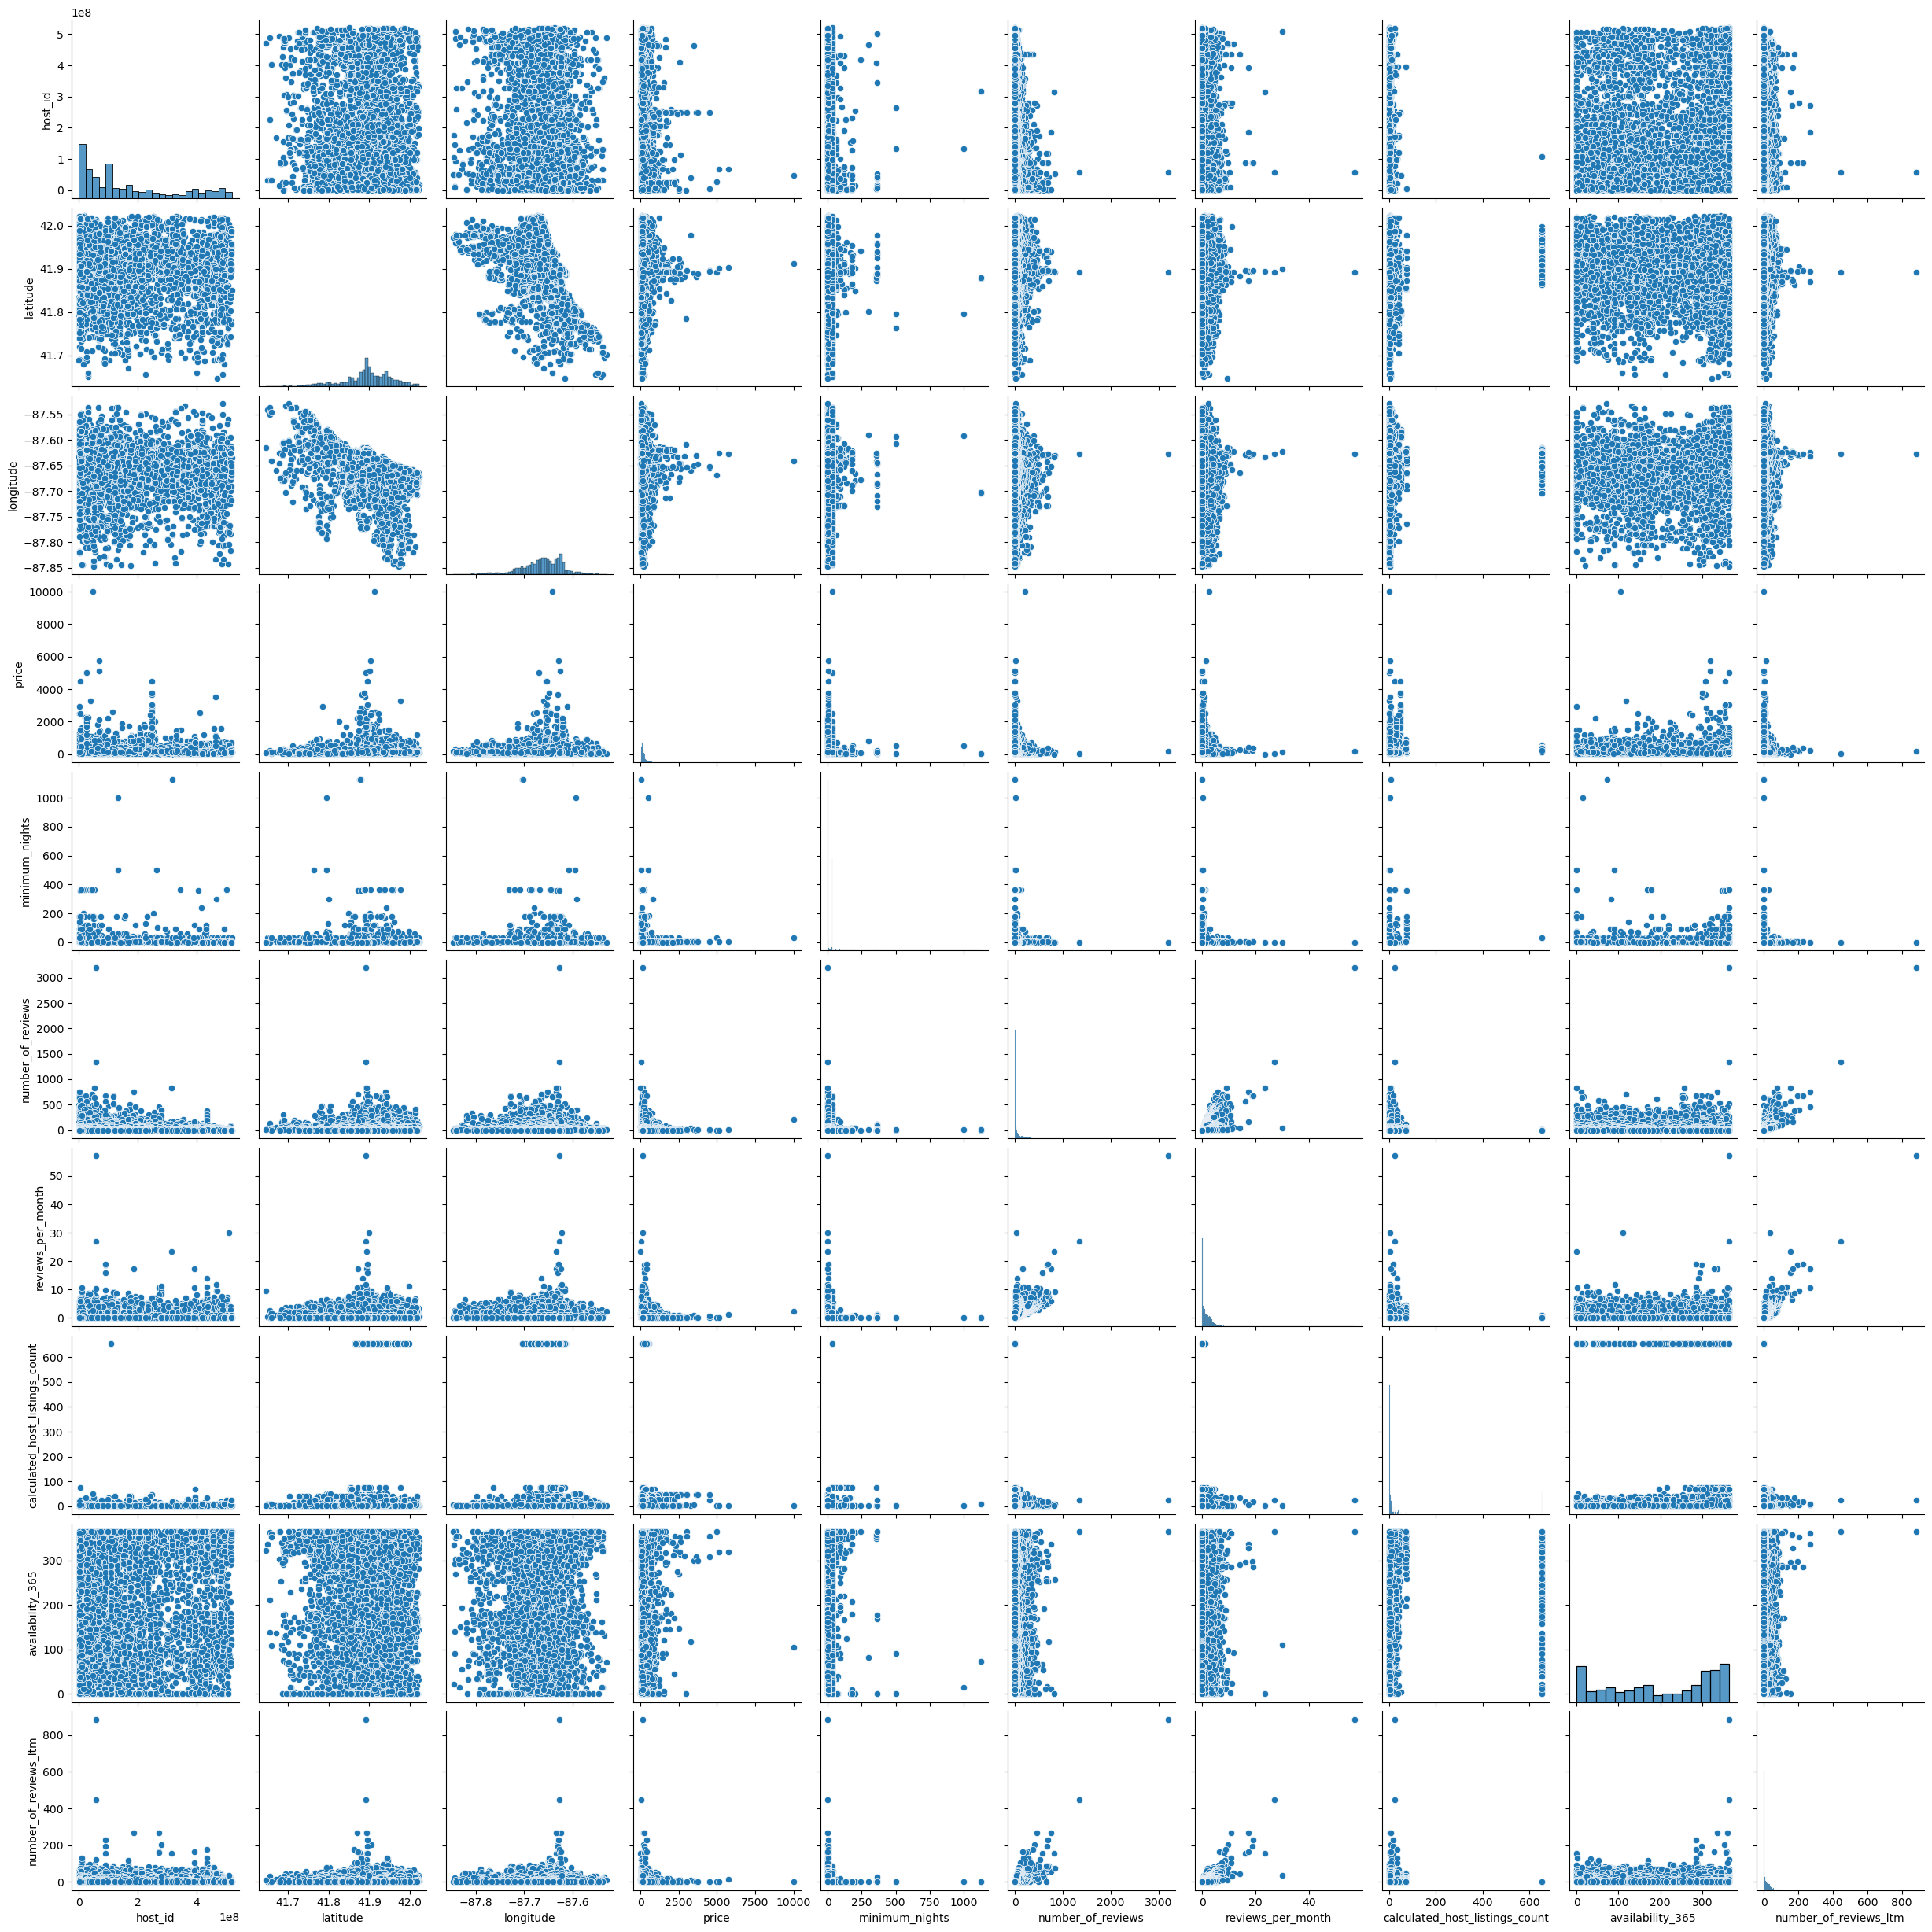

In [93]:
sns.pairplot(df)

##### Q:which neighbourhood has large average of price , what is maximum and minimum price in each neighbourhood ?

In [17]:
df.groupby(['neighbourhood'])['price'].describe().T

neighbourhood,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,...,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn
count,71.000000,8.000000,72.000000,8.000000,23.000000,51.000000,2.000000,165.000000,38.000000,14.00000,...,7.000000,52.000000,4.000000,17.000000,23.000000,10.000000,6.000000,99.000000,800.000000,122.000000
mean,149.535211,90.375000,210.041667,125.875000,112.826087,155.745098,84.500000,159.981818,150.342105,127.00000,...,164.000000,140.942308,95.750000,66.117647,83.652174,94.200000,111.333333,129.686869,301.153750,164.868852
std,134.495972,36.398342,206.526296,38.926442,89.215598,122.714277,27.577164,114.454884,123.544997,101.25216,...,74.424458,100.015374,8.460693,51.510778,55.217429,43.733537,55.420814,105.811311,458.275756,278.991630
min,43.000000,40.000000,33.000000,70.000000,29.000000,22.000000,65.000000,20.000000,21.000000,19.00000,...,79.000000,18.000000,85.000000,25.000000,25.000000,39.000000,51.000000,27.000000,22.000000,35.000000
25%,77.000000,72.750000,56.000000,96.000000,35.000000,72.000000,74.750000,96.000000,89.250000,54.25000,...,101.500000,77.750000,91.750000,31.000000,39.500000,63.000000,72.750000,61.000000,115.000000,70.500000
50%,117.000000,84.000000,152.500000,130.000000,88.000000,122.000000,84.500000,133.000000,105.500000,100.00000,...,163.000000,115.000000,96.500000,44.000000,69.000000,96.500000,110.500000,102.000000,172.000000,119.000000
75%,177.500000,107.250000,317.750000,152.500000,146.500000,193.500000,94.250000,187.000000,156.000000,175.50000,...,215.000000,173.500000,100.500000,100.000000,113.500000,112.750000,125.000000,156.500000,276.500000,194.750000
max,954.000000,159.000000,1200.000000,183.000000,325.000000,614.000000,104.000000,824.000000,580.000000,396.00000,...,273.000000,526.000000,105.000000,189.000000,250.000000,185.000000,206.000000,635.000000,5000.000000,2960.000000


####  show unique values of categorical columns and value counts 

In [18]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [19]:
df['room_type'].value_counts()

Entire home/apt    6201
Private room       1691
Shared room          84
Hotel room           48
Name: room_type, dtype: int64

In [20]:
df['neighbourhood'].unique()

array(['Hyde Park', 'West Town', 'West Lawn', 'Logan Square',
       'Lincoln Park', 'West Ridge', 'South Shore', 'North Center',
       'Uptown', 'East Garfield Park', 'Rogers Park', 'Edgewater',
       'Lake View', 'Near West Side', 'Pullman', 'Dunning',
       'Near North Side', 'Irving Park', 'North Lawndale',
       'Near South Side', 'Bridgeport', 'Kenwood', 'Loop',
       'Humboldt Park', 'Lincoln Square', 'Forest Glen', 'Beverly',
       'Lower West Side', 'Grand Boulevard', 'Woodlawn', 'Avondale',
       'South Lawndale', 'Armour Square', 'West Garfield Park',
       'Washington Park', 'Albany Park', 'Hermosa', 'Mckinley Park',
       'Douglas', 'Morgan Park', 'Portage Park', 'Hegewisch',
       'West Elsdon', 'Norwood Park', 'Garfield Ridge', 'Austin',
       'Ashburn', 'North Park', 'Greater Grand Crossing', 'Oakland',
       'Belmont Cragin', 'Jefferson Park', 'Archer Heights',
       'Brighton Park', 'Edison Park', 'Englewood', 'Montclare',
       'Chatham', 'Chicago Lawn'

In [21]:
df['neighbourhood'].value_counts()

Near North Side    960
West Town          800
Lake View          610
Near West Side     513
Logan Square       452
                  ... 
Edison Park          2
Avalon Park          2
Mount Greenwood      2
Burnside             1
Riverdale            1
Name: neighbourhood, Length: 77, dtype: int64

### Data visualization on numerical features

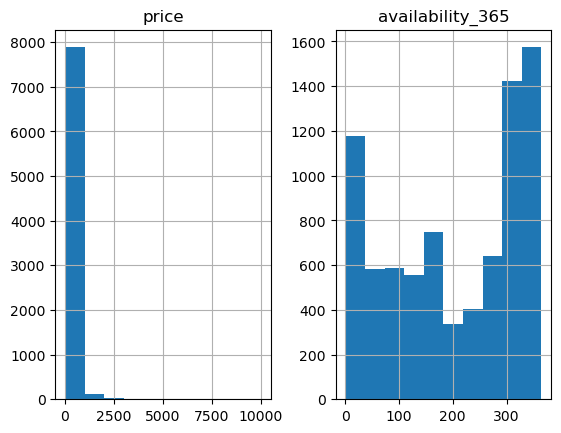

In [22]:
num_featuer=['price','availability_365']
df[num_featuer].hist()
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

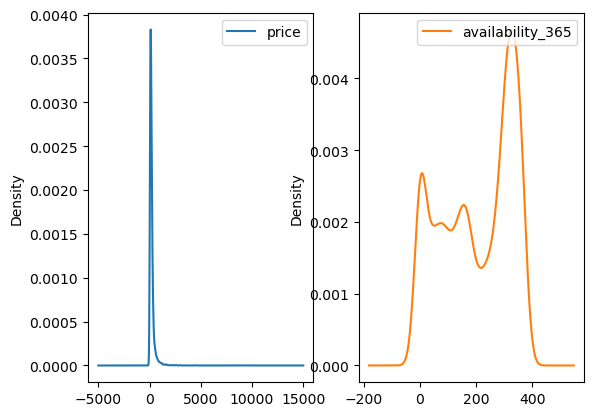

In [23]:
df[num_featuer].plot(kind='density',subplots=True,layout=(1,2),sharex=False)

 ##### This visualization shows distribution of data 

### Data visualization of categorical features

<Axes: xlabel='room_type', ylabel='count'>

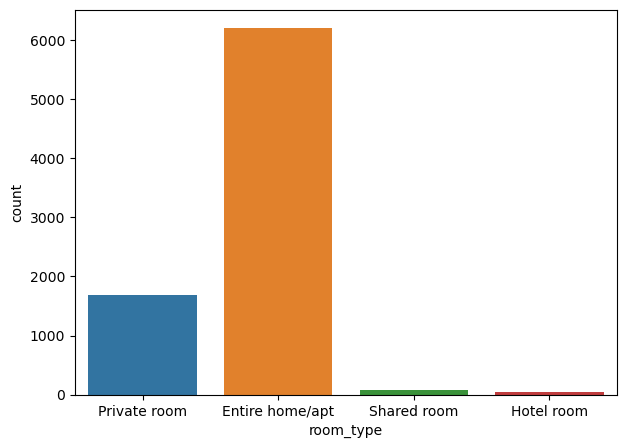

In [24]:
_,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,5))
sns.countplot(x='room_type',data=df)

#### Q :what effect of neighbourhood on price ?

In [43]:
# neighbour_df=pd.DataFrame(df['neighbourhood'].value_counts())
# top_10_neighbour=neighbour_df.iloc[0:10,:]
# top_10_neighbour

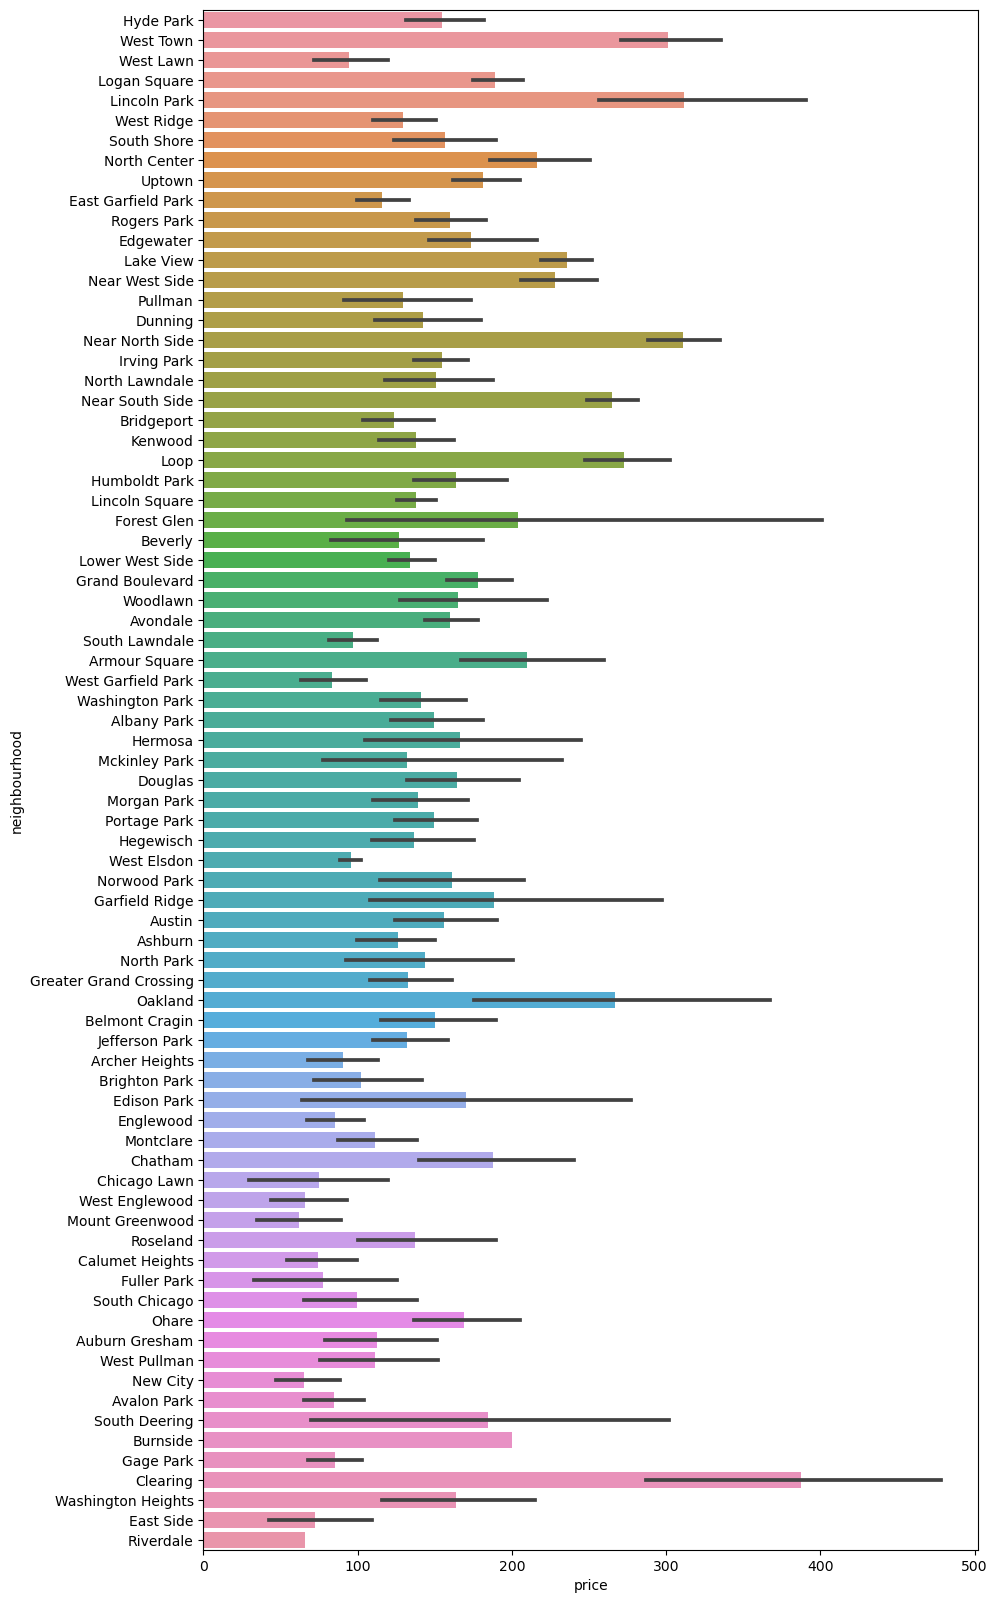

In [107]:
plt.figure(figsize=(10,20))

ax=sns.barplot(x=df['price'],y=df['neighbourhood'],data=df)

#### Q :what effect of room_type on price ?

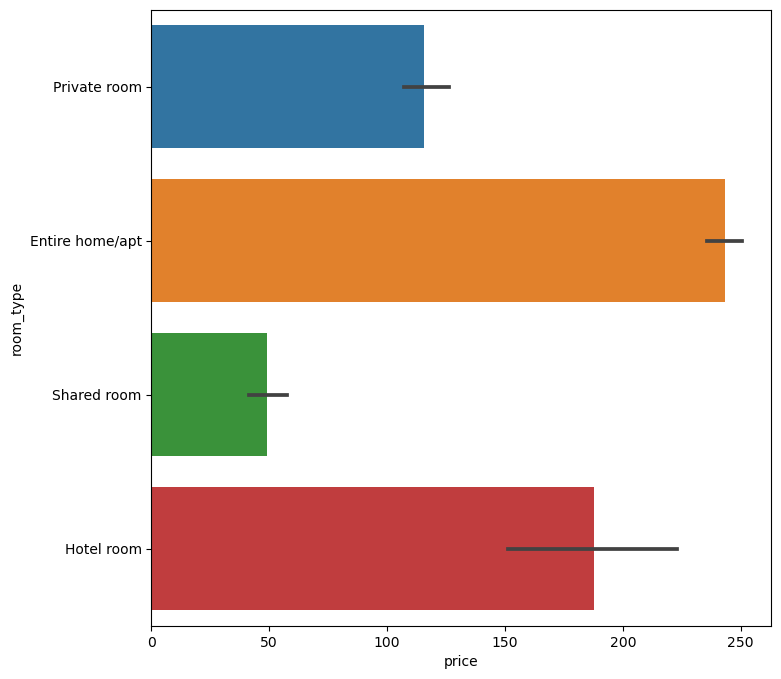

In [65]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x=df['price'],y=df['room_type'],data=df)


#### observation :the most type based on price Entire home/apt 

##### Q :what effect of latitude on price ?

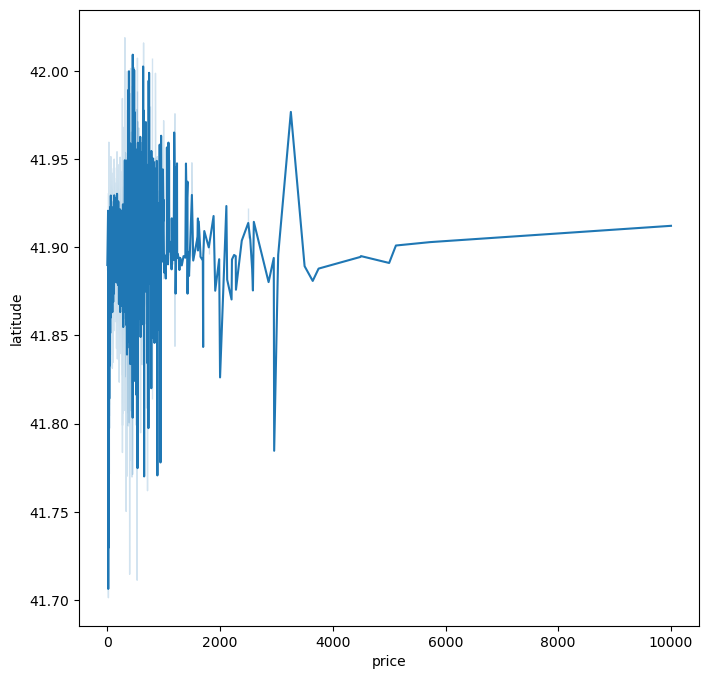

In [72]:
plt.figure(figsize=(8,8))
ax=sns.lineplot(x=df['price'],y=df['latitude'],data=df)

#### observation:the most latitude on less price

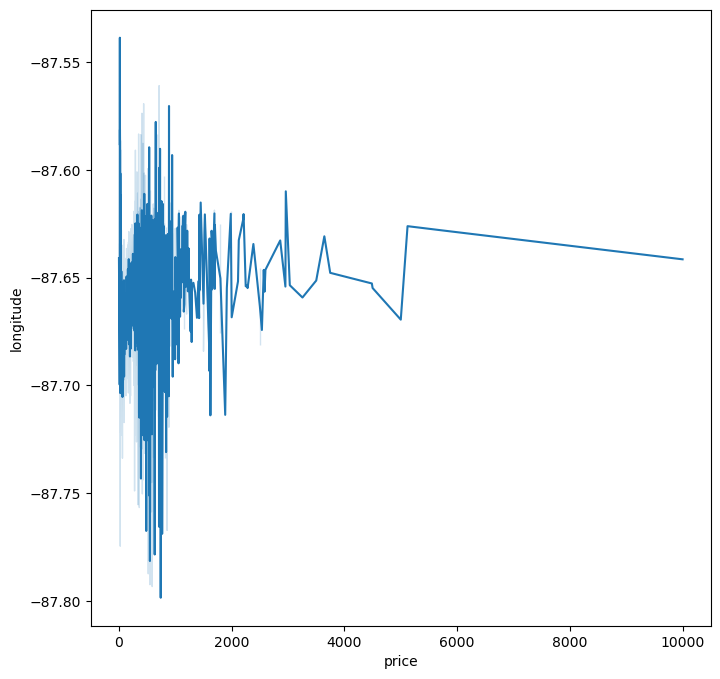

In [94]:
plt.figure(figsize=(8,8))
ax=sns.lineplot(x=df['price'],y=df['longitude'],data=df)

#### observation:the most longitude on less price

 #### number_of_reviews with neighbourhood 

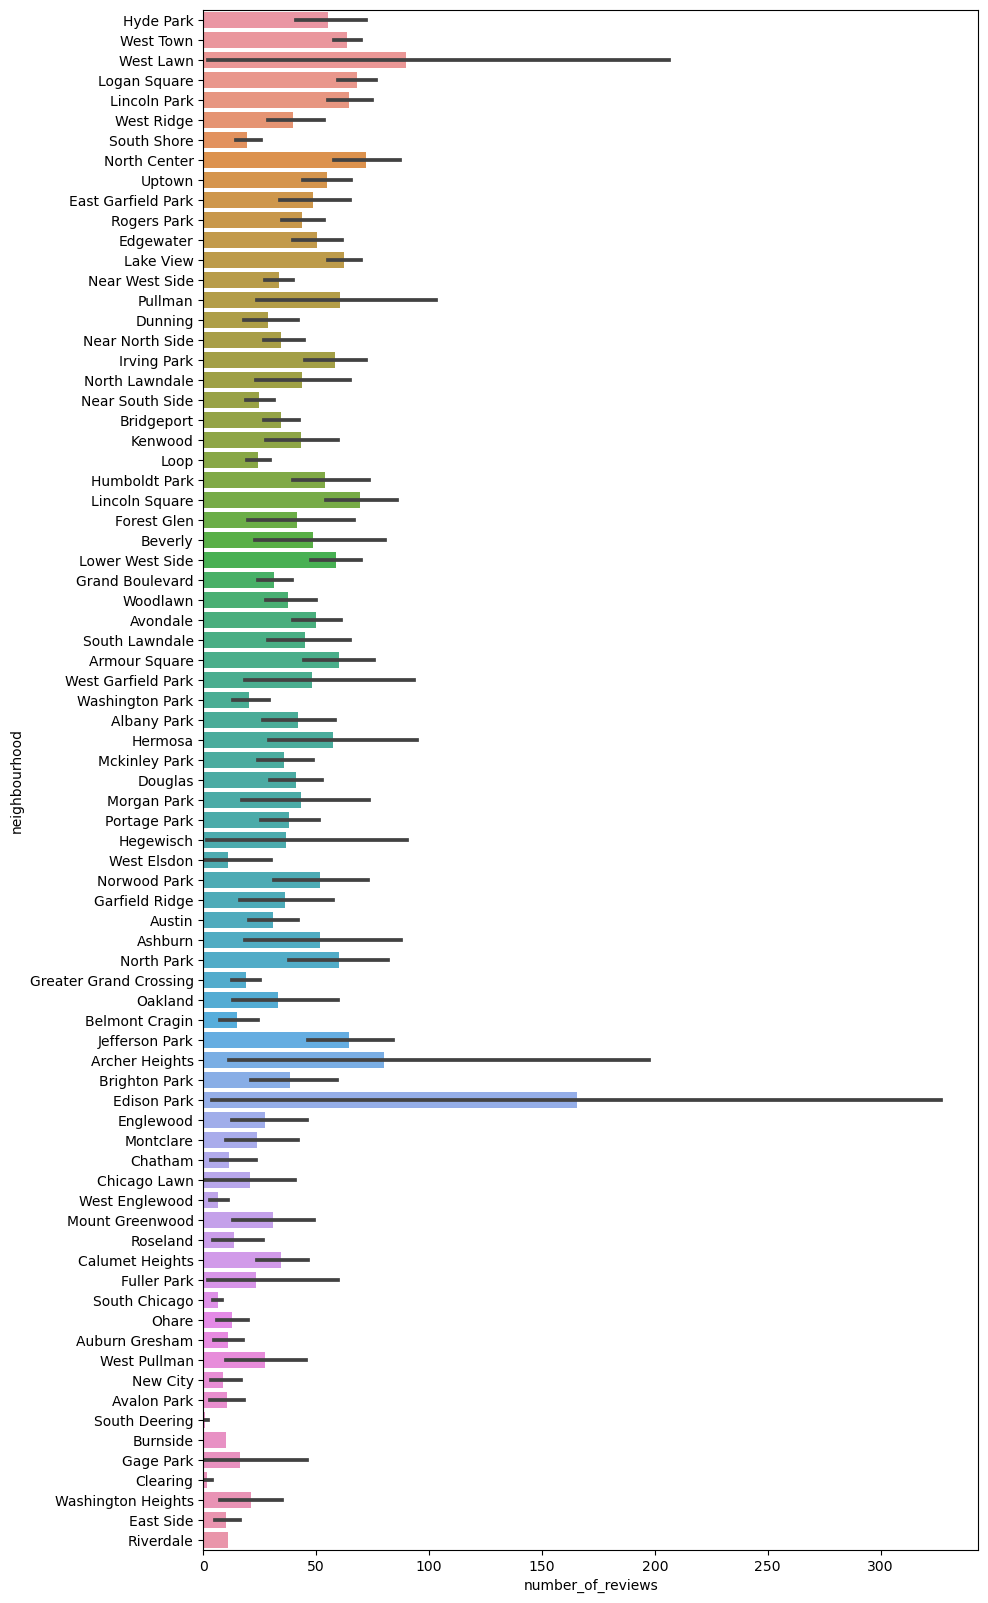

In [77]:
plt.figure(figsize=(10,20))
ax=sns.barplot(x=df['number_of_reviews'],y=df['neighbourhood'],data=df)

#### observation :the number of reviews on Edison park the largest

In [82]:
px.scatter(df, x='price', y='number_of_reviews',color='neighbourhood',size='number_of_reviews',size_max=50)

#### availability and price based on room type

<Axes: xlabel='availability_365', ylabel='price'>

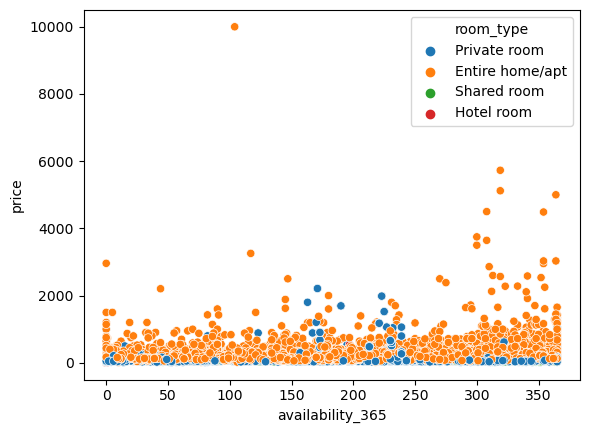

In [91]:
sns.scatterplot(x ='availability_365',y = 'price' ,hue = 'room_type' ,data = df)

#### observation : the most room type based on price and availabilty Entire home/apt then private room 

### relationship between price and number_of_reviews

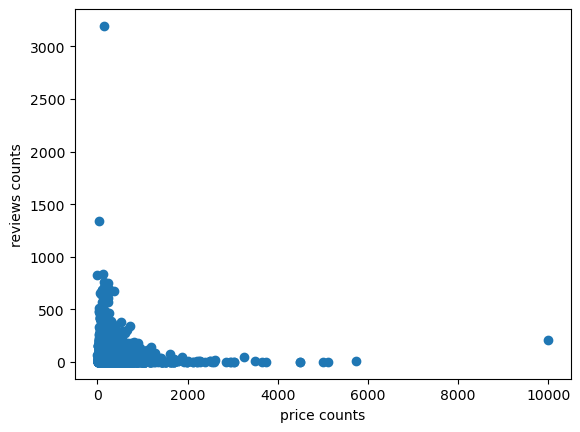

In [116]:
figsize=(8,8)
plt.scatter(df['price'],df['number_of_reviews'])
plt.xlabel('price counts')
plt.ylabel('reviews counts')
plt.show()

#### observation : the most reviews on less prices 

### Conclusions:
   This is simplest analysis on dataset airbnb for Chicago city
   using python packages ,we make analysis and data visulazation on columns on data 
   we find neighbourhood (the place of room) and type of room affect on price , reviews and availability of the room 
   
